<a href="https://colab.research.google.com/github/avaikol/IS262A-Final-Project/blob/main/is262_data_cleaning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
import matplotlib.ticker as ticker
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.font_manager as fm

In [ ]:
df = pd.read_csv('./data.csv')

1. Count ORCID ID vs. number of authors

In [ ]:
# Prepare lists for counting
all_authors = []
authors_with_orcid = []

# Iterate through each entry in the Author(s) column
for entry in df['Author(s)'].dropna():
    # Split authors separated by semicolons
    authors = [a.strip() for a in entry.split(',')]

    for a in authors:
        all_authors.append(a)

        # Detect ORCID in the format: 0000-0000-0000-0000
        if re.search(r'\b\d{4}-\d{4}-\d{4}-\d{4}\b', a):
            authors_with_orcid.append(a)

print("Total authors:", len(all_authors))
print("Authors with ORCID:", len(authors_with_orcid))

Total authors: 361
Authors with ORCID: 115


2. Locations of study and its relationship to funding sources, data deposited, and data repository, data availability statement, and data paper cited

In [ ]:
def plot_value_counts(df, column_name, title):
    """
    Splits semicolon-separated values in a column,
    counts occurrences, and plots them.
    """
    value_counts = {}

    for entry in df[column_name].dropna():
        values = [v.strip() for v in entry.split(';')]
        for v in values:
            value_counts[v] = value_counts.get(v, 0) + 1

    # Convert to dataframe
    count_df = pd.DataFrame.from_dict(value_counts, orient='index', columns=['Count'])
    count_df = count_df.sort_values('Count', ascending=False)

    # Plot
    # plt.figure(figsize=(10, 10))
    # ax = count_df.plot(kind='barh', figsize=(10, 10))

    # plt.xlabel("Number of Occurrences", fontsize=12)
    # plt.ylabel(column_name, fontsize=12)
    # plt.title(title, fontsize=14)

    # ax.tick_params(axis='y', labelsize=8)

    # plt.tight_layout(pad=1)
    # plt.show()

    return count_df

discipline_df = plot_value_counts(
    df,
    'Discipline/Concept',
    'Frequency of Disciplines'
)

location_df = plot_value_counts(
    df,
    'Affiliated Country',
    "Frequency of Study Locations"
)

funding_df = plot_value_counts(
    df,
    'Funding Source',
    "Frequency of Funding Sources"
)

data_deposited_df = plot_value_counts(
    df,
    'Data Deposited?',
    "Frequency of Data Deposited Responses"
)

repository_df = plot_value_counts(
    df,
    'Data Repository',
    "Frequency of Data Repository Names"
)

availability_df = plot_value_counts(
    df,
    'Data Availability Statement',
    "Frequency of Data Availability Statements"
)

data_paper_df = plot_value_counts(
    df,
    'Data Paper Cited?',
    "Frequency of Data Paper Cited Responses"
)


def show_table(title, table):
    display(Markdown(f"### {title}"))
    # Left-align index using CSS
    html = table.to_html(
        classes="left-align-table",
        border=0
    )

    styled_html = """
    <style>
        .left-align-table th {
            text-align: left !important;   /* left-align index (row labels) */
        }
        .left-align-table td {
            text-align: left;              /* left-align data cells */
        }
    </style>
    """ + html

    display(HTML(styled_html))

show_table("Affiliated Country", location_df)
show_table('Discipline/Concept', discipline_df)
show_table("Funding Sources", funding_df)
show_table("Data Deposited Responses", data_deposited_df)
show_table("Data Repository Names", repository_df)
show_table("Data Availability Statements", availability_df)
show_table("Data Paper Cited Responses", data_paper_df)

### Affiliated Country

,Count
United States,42
United Kingdom,16
Australia,9
Germany,7
Italy,6
Norway,5
China,4
Canada,4
France,4
Switzerland,4


### Discipline/Concept

,Count
Cultural Artifact,31
Fine Art,27
Decorative Art,10
Architecural Heritage,7
Architectural Heritage,3
Archaeological Site,3
Fine Art*,3
Commercial Art,2
*,2
Art Therapy,1


### Funding Sources

,Count
none listed,48
Smithsonian Institution,5
Andrew W. Mellon Foundation,3
National Science Foundation,3
Institute of Museum and Library Services,2
Getty Conservation Institute,2
Horizon 2020 Research and Innovation Program,2
Samuel H. Kress Foundation,2
National Museum of Asian Art,2
Portuguese Science and Technology Foundation (FCT-MCTES),2


### Data Deposited Responses

,Count
in paper,61
no,33
SI,7
repository,7
upon request,1


### Data Repository Names

,Count
none,93
Global Biodiversity Information Facility (GBIF),1
WorldClim,1
Winterthur Wiki,1
Cardiff University Data Catalog,1
Figshare,1
Technology Art Sciences TH Köln,1
project homepage,1
Harvard Dataverse,1


### Data Availability Statements

,Count
none,97
yes,3


### Data Paper Cited Responses

,Count
none,96
"Fujisawa, N., Bronken, I. A. T., Freeman, A. A., & Łukomski, M. (2023). Nanoindentation of softening modern oil paints. International Journal of Solids and Structures, 262–263, Article 112009.",1
"Grafix. 1991. “DuoShade Drawing System.” Material Safety Data Sheets (MSDS) issued July 1, 1991.",1
"Fick, S. E., and R. J. Hijmans. 2017. “WorldClim 2: New 1-km Spatial Resolution Climate Surfaces for Global Land Areas.” International Journal of Climatology 37 (12): 4302–4315.",1
,1
"Zhou, W. 2004. Research on the Alloy Composition of Ancient Chinese Coins. Beijing: Zhonghua Book Company.",1
"Ma, D., C. Gan, and W. Luo. 2021. “Lead Isotope and Trace Element Analysis of the Wuzhu Coins from Doujiaqiao Hoard, Tianjin City, North China.” The European Physical Journal Plus 136 (2): 193.",1
"Yu, T., A. Du, L. Wang, and Y. Hao. 2022. “An Analytical Study of Wuzhu of the Two Han Dynasties in the Collection of the Henan Museum.” Yellow River Yellow Earth Yellow Race 24: 56–59.",1


In [ ]:
def count_unique_items_by_location(df, location_col, value_col):
    loc_to_items = {}

    subset_df = df[[location_col, value_col]].dropna(subset=[location_col, value_col])

    for _, row in subset_df.iterrows():
        locations = [loc.strip() for loc in str(row[location_col]).split(';') if loc.strip()]
        values = [v.strip() for v in str(row[value_col]).split(';') if v.strip()]

        for loc in locations:
            if loc not in loc_to_items:
                loc_to_items[loc] = set()
            for val in values:
                loc_to_items[loc].add(val)

    counts = {loc: len(items) for loc, items in loc_to_items.items()}
    result = pd.DataFrame.from_dict(
        counts,
        orient='index',
        columns=[f'Unique "{value_col}" Count']
    )
    result.index.name = 'Affiliated Country'
    result = result.sort_values(result.columns[0], ascending=False)

    return result


def plot_unique_item_counts(table, title, value_col):
    plt.figure(figsize=(10, 10))
    ax = table.plot(kind='barh', figsize=(10, 10), legend=False)

    plt.xlabel("Unique Item Count", fontsize=12)
    plt.ylabel("Location", fontsize=12)
    plt.title(title, fontsize=14)

    # Force integer x-axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    ax.tick_params(axis='y', labelsize=8)
    plt.tight_layout(pad=1)
    plt.show()


# Column names
location_col = 'Affiliated Country'  # includes trailing space
cols_to_analyze = [
    'Funding Source',
    'Data Deposited?',
    'Data Repository',
    'Data Availability Statement',
    'Data Paper Cited?'
]

results = {}

for col in cols_to_analyze:
    title = f'Unique "{col}" per Affiliated Country'
    table = count_unique_items_by_location(df, location_col, col)
    results[col] = table

    # Show titled table
    display(Markdown(f"## {title} — Table"))
    # display(table)
    html = table.to_html(
        classes="left-align-table",
        border=0
    )

    styled_html = """
    <style>
        .left-align-table th {
            text-align: left !important;   /* left-align index (row labels) */
        }
        .left-align-table td {
            text-align: left;              /* left-align data cells */
        }
    </style>
    """ + html

    display(HTML(styled_html))

    # Plot
    # plot_unique_item_counts(table, f'{title} — Plot', col)

## Unique "Funding Source" per Affiliated Country — Table

,"Unique ""Funding Source"" Count"
Affiliated Country,
United States,29
Germany,11
Switzerland,9
China,8
United Kingdom,8
Norway,7
France,6
Italy,6
Australia,5


## Unique "Data Deposited?" per Affiliated Country — Table

,"Unique ""Data Deposited?"" Count"
Affiliated Country,
United States,4
United Kingdom,4
Netherlands,3
Italy,3
Canada,3
Switzerland,3
Germany,3
Australia,2
Portugal,2


## Unique "Data Repository" per Affiliated Country — Table

,"Unique ""Data Repository"" Count"
Affiliated Country,
United Kingdom,4
Germany,4
United States,3
Switzerland,2
the Netherlands,2
Egypt,1
South Africa,1
Saudi Arabia,1
Türkiye,1


## Unique "Data Availability Statement" per Affiliated Country — Table

,"Unique ""Data Availability Statement"" Count"
Affiliated Country,
China,2
United Kingdom,2
United States,2
Luxembourg,1
the Netherlands,1
New Zealand,1
Austrailia,1
Greece,1
Belgium,1


## Unique "Data Paper Cited?" per Affiliated Country — Table

,"Unique ""Data Paper Cited?"" Count"
Affiliated Country,
China,4
United States,3
Norway,2
United Kingdom,2
Iran,1
Peru,1
South Africa,1
Saudi Arabia,1
Türkiye,1


Using font: /System/Library/Fonts/ヒラギノ明朝 ProN.ttc


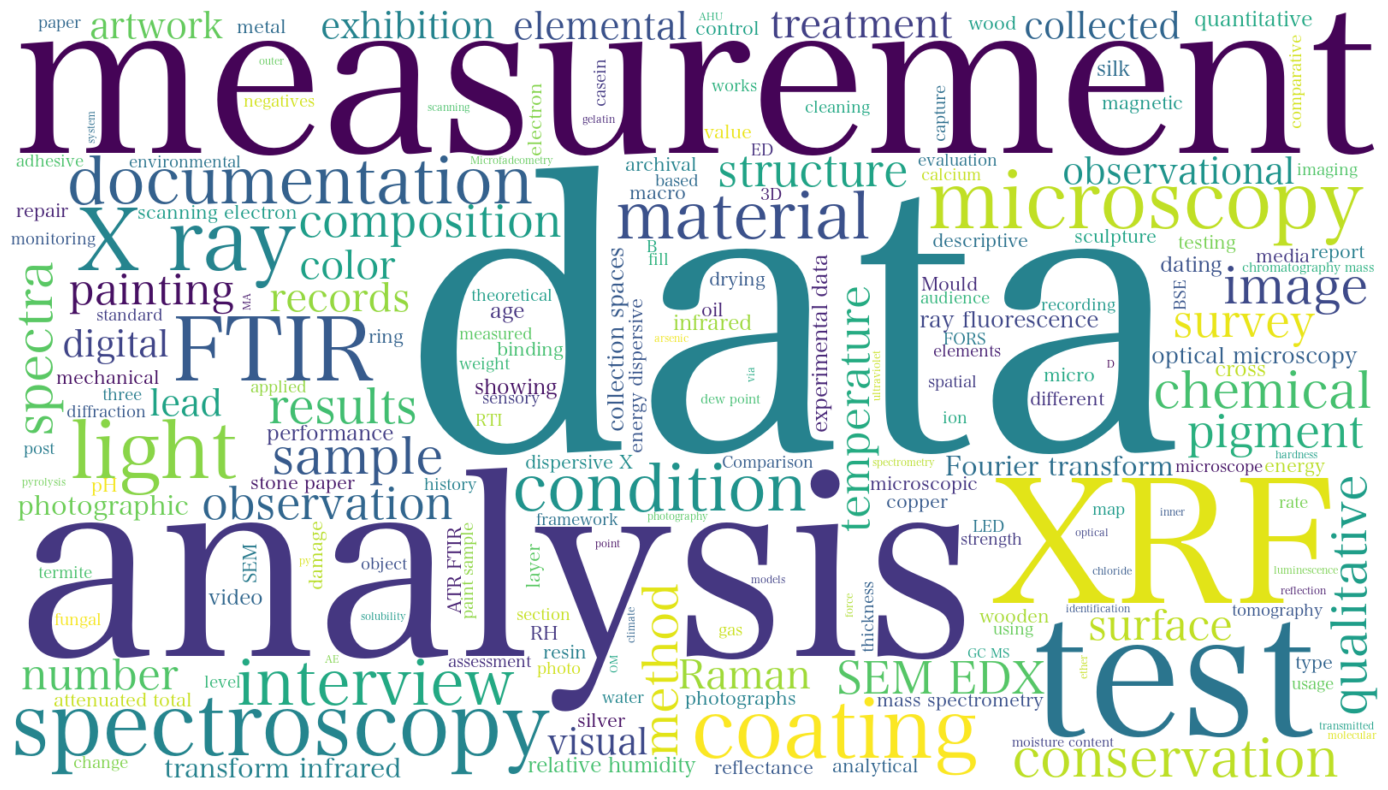

In [ ]:
# Load data
df = pd.read_csv("./data.csv")

# Helper: extract words from Data Collected
def extract_and_clean(raw_entry):
    if pd.isna(raw_entry):
        return []
    text = str(raw_entry)
    text = text.replace(",", " ").replace(";", " ").replace(".", " ")
    text = re.sub(r"\band\s+", "", text, flags=re.IGNORECASE)
    parts = [p.strip() for p in text.split() if p.strip()]
    return parts

# Gather all words
all_words = []
for entry in df["Data Collected"].dropna():
    all_words.extend(extract_and_clean(entry))

text_blob = " ".join(all_words)


# Automatically find a valid system TTF font
ttf_fonts = [f for f in fm.findSystemFonts(fontpaths=None, fontext='ttf')]
if not ttf_fonts:
    raise RuntimeError("No TTF fonts found on this system.")
font_path = ttf_fonts[-1]   # use the first available TTF font

print("Using font:", font_path)

# Generate word cloud
wc = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    font_path=font_path
).generate(text_blob)

# Plot
plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

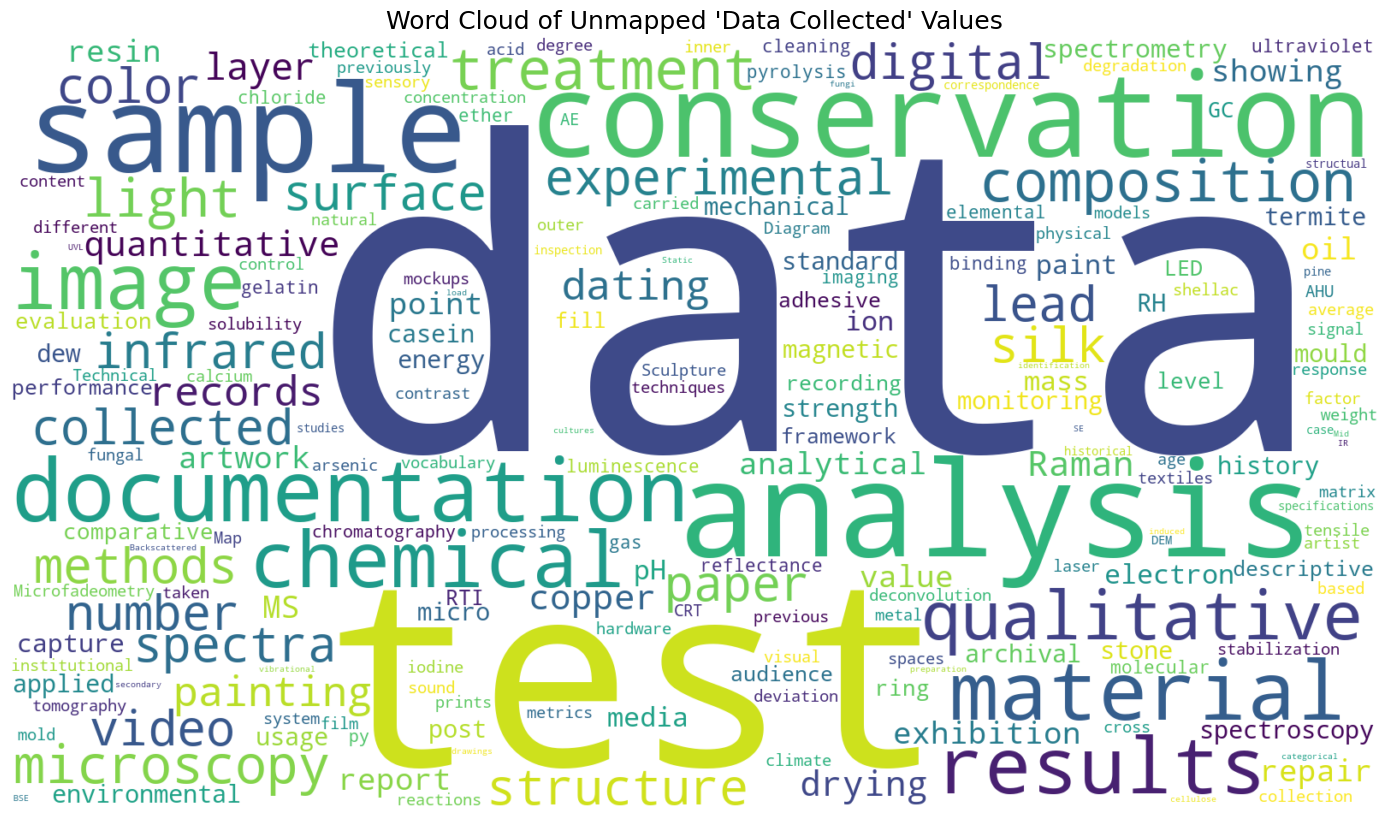

In [ ]:
# Extract unmapped values
unmapped = []
for _, row in df.iterrows():
    cleaned_vals = extract_and_clean_data_collected(row["Data Collected"])
    for val in cleaned_vals:
        if map_clean_value_to_aat(val, aat) is None:
            unmapped.append(val)

# 2. Combine into one text blob
text_blob = " ".join(unmapped)

# 3. Generate the Word Cloud
wordcloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    collocations=False,
    prefer_horizontal=1.0,
).generate(text_blob)

# 4. Plot the Word Cloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Unmapped 'Data Collected' Values", fontsize=18)
plt.show()


AAT Preferred Terms: ['Photography', 'X-radiography', 'Electronic Imaging', 'Optical Microscopy', 'Electron Microscopy', 'Fourier Transform Infrared Spectroscopy (FTIR)', 'Wave-length Dispersive X-ray Fluorescence Spectroscopy (XRF)', 'Fiber Optic Reflectance Spectroscopy (FORS)', 'Chemical Analysis', 'Elemental Analysis', 'Observations', 'Architecture Records', 'Museum Records', 'Interviews', 'Surveys', 'Archival Materials', 'Wood', 'Colorant', 'Coating', 'Measurements', 'Conditions']
Total cleaned tokens: 618
Mapped: 214
Unmapped: 404
Unique unmapped: 382
Total nodes in 2-level tree: 210
Number of AAT preferred-term parents: 19
Positioned nodes: 210


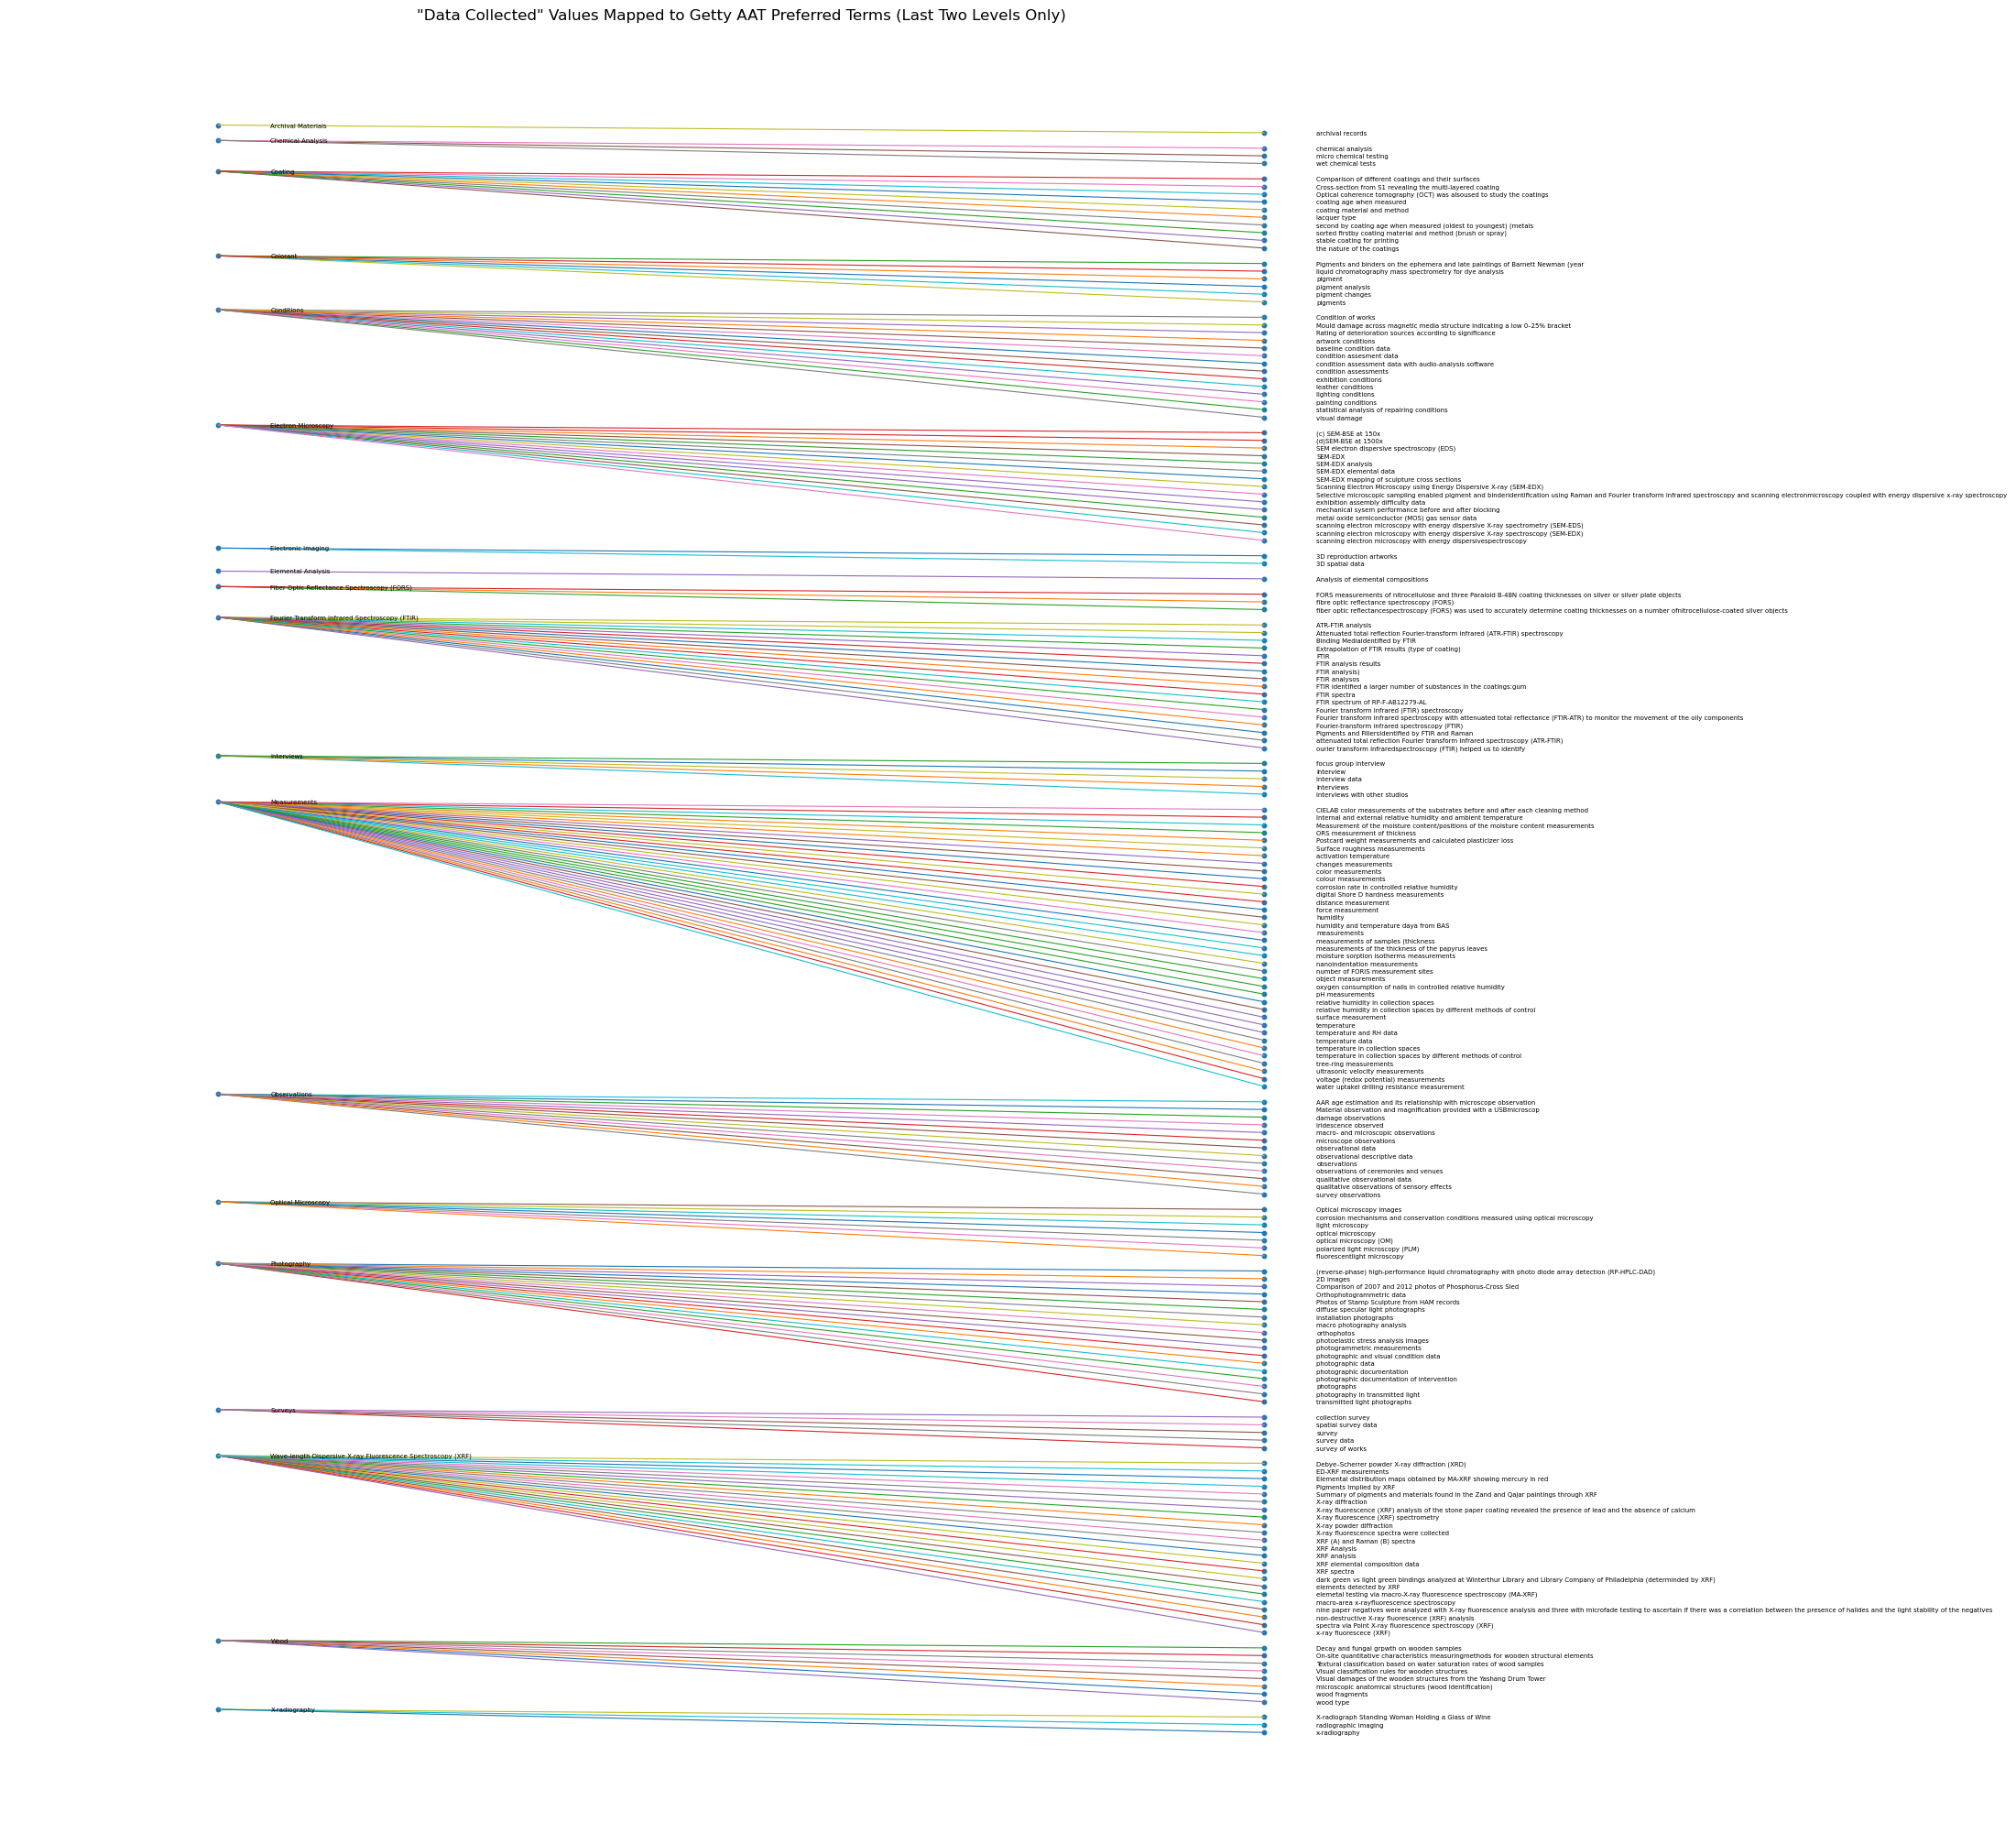

Saved PNG to: ./tree_cleaned_data_collected_updated_aat_2level.png


In [ ]:
# 1. Load updated AAT subset and main data

df = pd.read_csv("./data.csv")
aat = pd.read_csv("./aat_subset_terms.csv", skiprows=1)

# Ensure correct column names
expected_cols = ["Category", "Preferred Term", "Hierarchy Path"]
if list(aat.columns) != expected_cols:
    aat.columns = expected_cols

aat_terms = aat["Preferred Term"].tolist()
print("AAT Preferred Terms:", aat_terms)


# 2. Clean and split Data Collected values
#    - Replace "," and "." with ";"
#    - Split on ";"
#    - Strip whitespace
#    - Remove leading "and "

def extract_and_clean_data_collected(raw_entry):
    """
    Normalize separators, split, and clean:
      - convert ',' and '.' into ';'
      - split on ';'
      - strip whitespace
      - remove leading 'and ' (case-insensitive) from each token
    """
    if pd.isna(raw_entry):
        return []
    normalized = (
        str(raw_entry)
        .replace(",", ";")
        .replace(".", ";")
    )
    parts = [p.strip() for p in normalized.split(";") if p.strip()]
    cleaned = []
    for p in parts:
        cleaned_val = re.sub(r"^and\s+", "", p.strip(), flags=re.IGNORECASE)
        cleaned.append(cleaned_val)
    return cleaned


# 3. Keyword-based mapping rules aligned to UPDATED AAT terms
#    IMPORTANT:
#    - Observations is defined.
#    - Observations appears BEFORE Electron Microscopy.
#    - 'bse' removed as a bare substring from Electron Microscopy.

raw_mapping_rules = {
    # Imaging-making Process and Techniques
    "Photography": [
        "photo", "photograph", "photography", "2d images"
    ],
    "X-radiography": [
        "x-radiograph", "x radiograph", "x-radiography", "radiograph"
    ],
    "Electronic Imaging": [
        "electronic imaging", "digital image", "digital imaging",
        "3d reproduction", "3d spatial data", "3d imaging", "3d images"
    ],

    # --- Observations FIRST so it wins on 'observ*' text ---
    "Observations": [
        "observational data",
        "observational descriptive data",
        "macro- and microscopic observations",
        "macro and microscopic observations",
        "survey observations",
        "damage observations",
        "iridescence observed",
        "qualitative observational data",
        "qualitative observations",
        "microscope observations",
        "observations of",
        "observations",      # generic catch
        "observation"
    ],

    # Microscopy Techniques
    "Optical Microscopy": [
        "brightfield", "light microscope", "light microscopy",
        "optical microscope", "optical microscopy", "lm image"
    ],
    "Electron Microscopy": [
        "sem",
        "scanning electron",
        "electron microscopy"
        # removed plain "bse" and "backscattered" to avoid matching "obse..."
    ],

    # Spectroscopy Techniques
    "Fourier Transform Infrared Spectroscopy (FTIR)": [
        "ftir", "fourier transform infrared"
    ],
    "Wave-length Dispersive X-ray Fluorescence Spectroscopy (XRF)": [
        "wdxrf", "xrf", "wavelength dispersive x-ray fluorescence",
        "xray", "x-ray", "x ray"
    ],
    "Fiber Optic Reflectance Spectroscopy (FORS)": [
        "fors", "fiber optic reflectance spectroscopy"
    ],

    # Scientific Analysis
    "Chemical Analysis": [
        "chemical analysis", "chemical testing", "wet chemical"
    ],
    "Elemental Analysis": [
        "elemental analysis", "elemental composition", "analysis of elemental"
    ],

    # Documentation / Records / Information
    "Architecture Records": [
        "architectural drawings", "architectural records", "building plans"
    ],
    "Museum Records": [
        "museum records", "collection records", "object records", "registration records"
    ],
    "Interviews": [
        "interview", "oral history"
    ],
    "Surveys": [
        "survey", "questionnaire"
    ],
    "Archival Materials": [
        "archival material", "archives", "archival documents", "archival records"
    ],

    # Materials
    "Wood": [
        "wood", "wooden"
    ],
    "Colorant": [
        "colorant", "pigment", "dye", "smalt"
    ],
    "Coating": [
        "coating", "varnish", "lacquer", "surface coating"
    ],
    # Updated AAT includes these:
    "Measurements": [
        "measurement", "measurements", "humidity", "temperature", "thickness"
    ],
    "Conditions": [
        "condition", "damage", "cracks", "flaking", "deterioration", "corrosion"
    ],
}

# Intersect mapping rules with actual AAT terms to avoid mismatches
mapping_rules = {
    k: v for k, v in raw_mapping_rules.items() if k in aat_terms
}


# 4. Map cleaned value → AAT Preferred Term (row dict)

def map_clean_value_to_aat(clean_value, aat_df):
    """
    Return a dict for the matched AAT row (Category, Preferred Term, Hierarchy Path),
    or None if no mapping found.
    """
    text = clean_value.lower()
    for pref_label, keywords in mapping_rules.items():
        if any(kw in text for kw in keywords):
            match = aat_df[aat_df["Preferred Term"] == pref_label]
            if not match.empty:
                return match.iloc[0].to_dict()
    return None

all_cleaned = []
mapped_list = []
unmapped_list = []

for _, row in df.iterrows():
    cleaned_vals = extract_and_clean_data_collected(row["Data Collected"])
    for val in cleaned_vals:
        all_cleaned.append(val)
        m = map_clean_value_to_aat(val, aat)
        if m is None:
            unmapped_list.append(val)
        else:
            mapped_list.append(val)

total_cleaned_tokens = len(all_cleaned)
mapped_count = len(mapped_list)
unmapped_count = len(unmapped_list)
unique_unmapped_count = len(set(unmapped_list))

print(f"Total cleaned tokens: {total_cleaned_tokens}")
print(f"Mapped: {mapped_count}")
print(f"Unmapped: {unmapped_count}")
print(f"Unique unmapped: {unique_unmapped_count}")


# 5. Build 2-level tree:
#    AAT Preferred Term → cleaned raw "Data Collected" values

children = defaultdict(set)
all_nodes = set()

for _, row in df.iterrows():
    cleaned_list = extract_and_clean_data_collected(row["Data Collected"])
    if not cleaned_list:
        continue

    for raw_clean in cleaned_list:
        mapped = map_clean_value_to_aat(raw_clean, aat)
        if mapped is None:
            # unmapped cleaned values are skipped in this tree
            continue

        pref = mapped["Preferred Term"]

        # Only keep the last two levels of each branch:
        # Preferred Term → cleaned value
        children[pref].add(raw_clean)
        all_nodes.update([pref, raw_clean])

print(f"Total nodes in 2-level tree: {len(all_nodes)}")
print(f"Number of AAT preferred-term parents: {len(children)}")


# 6. Compute roots and assign positions (iterative layout)

all_children = {c for kids in children.values() for c in kids}
roots = [n for n in all_nodes if n not in all_children]

positions = {}
y_counter = 0

def place_tree():
    """
    Assign (x=depth, y=index) layout using a stack
    to avoid recursion depth issues.
    """
    global y_counter
    for root in sorted(roots):
        stack = [(root, 0)]
        while stack:
            node, depth = stack.pop()
            if node not in positions:
                positions[node] = (depth, -y_counter)
                y_counter += 1
                for child in sorted(children.get(node, []), reverse=True):
                    stack.append((child, depth + 1))

place_tree()

print(f"Positioned nodes: {len(positions)}")


# 7. Plot: borderless 2-level tree + PNG export

plt.figure(figsize=(22, 20))
ax = plt.gca()

# Remove axes and borders
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add margins so labels don't run off the edges
plt.margins(x=0.2, y=0.05)

# Draw edges
for parent, kids in children.items():
    if parent not in positions:
        continue
    x0, y0 = positions[parent]
    for child in kids:
        if child not in positions:
            continue
        x1, y1 = positions[child]
        plt.plot([x0, x1], [y0, y1], linewidth=0.8)

# Draw nodes
xs = [pos[0] for pos in positions.values()]
ys = [pos[1] for pos in positions.values()]
plt.scatter(xs, ys, s=10)

# Draw labels
for node, (x, y) in positions.items():
    plt.text(x + 0.05, y, node, fontsize=5, va="center")

plt.title("\"Data Collected\" Values Mapped to Getty AAT Preferred Terms (Last Two Levels Only)", pad=20)
plt.tight_layout()

# Save PNG
output_path = "./tree_cleaned_data_collected_updated_aat_2level.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()

print("Saved PNG to:", output_path)

In [ ]:
# 8. Add "data collected (AAT)" column to df
#    Each row gets the AAT Preferred Term(s) corresponding to its "Data Collected" values,
#    using the same mapping logic as the tree.

def get_row_aat_terms(raw_entry, aat_df):
    """
    For a single 'Data Collected' cell:
      - clean and split into tokens
      - map each token to an AAT Preferred Term (if possible)
      - return a de-duplicated, order-preserving string of Preferred Terms
        joined by '; ', e.g. "Coating; Colorant"
    """
    cleaned_vals = extract_and_clean_data_collected(raw_entry)
    pref_terms = []

    for val in cleaned_vals:
        mapped = map_clean_value_to_aat(val, aat_df)
        if mapped is not None:
            pref_terms.append(mapped["Preferred Term"])

    # de-duplicate but preserve order
    seen = set()
    ordered_unique = []
    for t in pref_terms:
        if t not in seen:
            seen.add(t)
            ordered_unique.append(t)

    # If nothing mapped, return empty string (or None if you prefer)
    if not ordered_unique:
        return ""
    return "; ".join(ordered_unique)

# Apply to each row to create the new column
df["data collected (AAT)"] = df["Data Collected"].apply(
    lambda x: get_row_aat_terms(x, aat)
)

# Quick check
print(df[["Data Collected", "data collected (AAT)"]].head())

# Optionally save to a new CSV
output_csv_path = "./data_with_aat_column.csv"
df.to_csv(output_csv_path, index=False)
print("Saved updated CSV with AAT column to:", output_csv_path)

                                      Data Collected  \
0  wood fragments; categorical data; microscopic ...   
1  paint samples; quantitative; moisture sorption...   
2  chloride ion, pH, and voltage (redox potential...   
3               video recordings, observational data   
4  paintings & drawings; infrared reflectance (IR...   

                                data collected (AAT)  
0  Wood; Colorant; Elemental Analysis; Chemical A...  
1                                       Measurements  
2                                       Measurements  
3                                       Observations  
4  Fourier Transform Infrared Spectroscopy (FTIR)...  
Saved updated CSV with AAT column to: ./data_with_aat_column.csv
